# Análise estatística do consumo de cerveja por estudantes universitários da cidade de São Paulo

---

## 📱 Projeto 

- **Dataframe utilizado:** <a href="https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo" target="_blank">Consumo de cerveja - São Paulo</a>;

- **Objetivo:** 

  - Prever o consumo de cerveja por estudantes universitários usando como base dados climáticos e o dia da semana (final de semana ou não); 

- **Regras de negócio:**

  - É possível prever a quantidade de cerveja que um estudante universitário irá consumir com base em dados climáticos e dias da semana?

  - O final de semana influencia no consumo de bebida de estudantes universitários?

  - Em qual condição um estudante universitário consome mais cerveja?

- **Tipo de aprendizado:** Aprendizado supervisionado.
---

## Importação de dados e bibliotecas

In [1]:
#!pip install plotly

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')

##### Importação do data set

In [18]:
data=pd.read_csv("../input/Consumo_cerveja.csv")

---
Obtendo informações sobre o dataframe:

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


#### Informações do dataset:

**Contexto:** Os dados foram coletados em São Paulo - Brasil, em área universitária, onde acontecem algumas festas com turmas de alunos de 18 a 28 anos aproximadamente.

**Atributos:**

| Atributo | Valores |
|--- |--- |
| Temperatura Media | C° | 
| Temperatura Minima | C° |
| Temperatura Maxima | C° |
| Precipitacao | mm |
| Final de semana | Sim ou não | 
| Consumo de cerveja | Litros |

##### Alguns dados do dataset

In [20]:
data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


---
#### Formatação dos dados

In [21]:
data = data.dropna()

In [22]:
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.replace('[)(]' ,'')

In [23]:
data['Temperatura_Media_C'] = data['Temperatura_Media_C'].str.replace(',' ,'.').astype(float)
data['Temperatura_Minima_C'] = data['Temperatura_Minima_C'].str.replace(',' ,'.').astype(float)
data['Temperatura_Maxima_C'] = data['Temperatura_Maxima_C'].str.replace(',' ,'.').astype(float)
data['Precipitacao_mm'] = data['Precipitacao_mm'].str.replace(',' ,'.').astype(float)
data['Final_de_Semana'] = data['Final_de_Semana'].astype(int)

---
#### Estatísticas do dado target (Consumo de cerveja)

In [9]:
data["Consumo_de_cerveja_litros"].describe()

count    365.000000
mean      25.401367
std        4.399143
min       14.343000
25%       22.008000
50%       24.867000
75%       28.631000
max       37.937000
Name: Consumo_de_cerveja_litros, dtype: float64

### Observações de consumo 

-   Total de 365 amostras;
-   Média de 25,4 litros de cerveja consumidos por dia aproximadamente; 
-   Quantidade mínima de consumo de cerveja em um dia foi de 14, 3 litros;
-   Quantidade máxima de cerveja consumida em um dia foi de 38 litros aproximadamente.

---
#### Quantidade de cerveja consumida dividida em dias da semana e final de semana

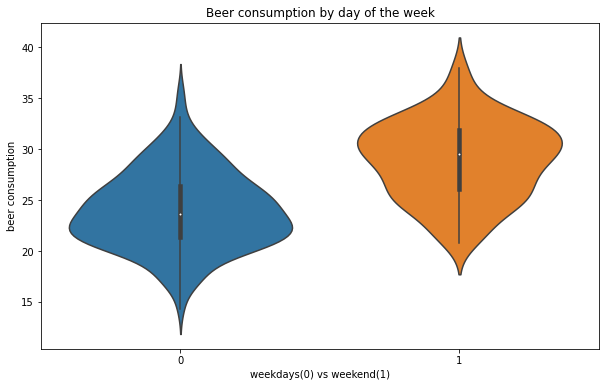

In [10]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Final_de_Semana", y="Consumo_de_cerveja_litros",data=data)
plt.title("Beer consumption by day of the week")
plt.xlabel("weekdays(0) vs weekend(1)")
plt.ylabel("beer consumption")
plt.show()

- Média de consumo de cerveja em uma dia durante a semana

In [11]:
(sum(data.Consumo_de_cerveja_litros[data.Final_de_Semana==0]))/data["Final_de_Semana"][data.Final_de_Semana==0].count()

23.998222222222218

- Média de consumo de cerveja em uma dia de final de semana

In [12]:
(sum(data.Consumo_de_cerveja_litros[data.Final_de_Semana==1]))/data["Final_de_Semana"][data.Final_de_Semana==1].count()

28.922721153846165

##### Comparação entre o consumo durante a semana e o final de semana

Com base no gráfico da quantidade de cerveja consumida dividida em dias da semana e final de semana e nas médias de consumo durante a semana e no final de semana, pode-se concluir que o consumo de cerveja no final de semana é relativamente maior que o consumo durante a semana, apresentando uma diferença média de quase 5 litros.

---
#### Correlação dos dados analisados

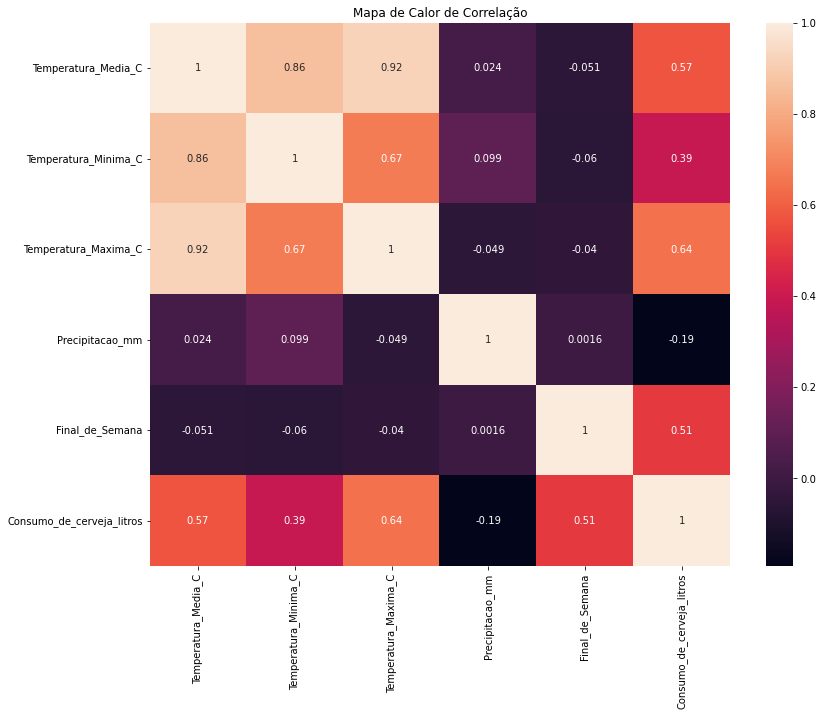

In [187]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True)
plt.title("Mapa de Calor de Correlação")
plt.show()

##### Análise da correlação

De acordo com a correlação podemos retirar as seguintes conclusões baseadas no coeficiente de correlação de Pearson (p):

- **Consumo de cerveja e temperatura:** com um coeficiente positivo nas 3 variantes (máxima, mínima e média), e um valor considerável, pode-se impor que o consumo de cerveja possui uma correlação diretamente proporcional e relativamente alta em relação a temperatura;

- **Consumo de cerveja e precipitação:** embora o coeficiente de pearson não seja muito grande, de apenas -0.19, a precipitação influencia diretamente no consumo de cerveja;

- **Consumo de cerveja e final de semana**: com um coeficiente de 0.5, o critério final de semana tem correlação grande com o consumo de cerveja.
---

##### Modelagem

- Separação entre dados de treino(75% do dataset) e dados de teste(25% do dataset).

In [205]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Consumo_de_cerveja_litros']), data['Consumo_de_cerveja_litros'], random_state=72, test_size=0.25)

- Formatação do tipo dos dados da coluna consumo de cerveja.

In [206]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
lab_enc = preprocessing.LabelEncoder()
X_train['Data'] = lab_enc.fit_transform(X_train['Data'])
X_test['Data'] = lab_enc.fit_transform(X_test['Data'])

- Treinamento do modelo preditivo

In [219]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Coeficientes da predição

In [220]:
# Visualizando as variavies mais importantes para o classificador
fig = go.Figure(data=[go.Pie(labels=X_train.columns, values=abs(regressor.coef_))])
fig.update_layout(title='Variáveis mais importantes para o classificador')
fig.show()

##### Análise da importância das variáveis da predição

De acordo com o gráfico apresentado acima podemos tirar as seguintes induções:

- **Temperaturas:** A temperatura máxima  possui uma certa relevancia enquanto as demais possuem menos;

- **Data:** Data possui menor relevância entre os indices da predição;

- **Precipitação:** Possui pequena relevância para predição;

- **Final de semana**: Possui a maior relevância na predição.
---

#### Tabela com dados Verdadeiros ao lado dos dados Previstos

In [218]:
y_pred2 = regressor.predict(X_test)
df = pd.DataFrame({'Verdadeiro': y_test, 'Previsto': y_pred2})
df

,Verdadeiro,Previsto
226,29,29.111255
269,32,31.377900
362,22,21.280365
265,32,27.786090
359,21,25.615060
...,...,...
153,21,19.754788
180,20,21.766354
280,33,27.859717
314,29,27.089379


#### Avaliação de desempenho

In [216]:
from sklearn import metrics
print('Erro médio absoluto :', metrics.mean_absolute_error(y_test, y_pred))
print('Erro quadratico médio:', metrics.mean_squared_error(y_test, y_pred))
print('Raiz do erro quadratico médio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Erro médio absoluto : 2.6956521739130435
Erro quadratico médio: 11.804347826086957
Raiz do erro quadratico médio: 3.4357455997333326


- O modelo de predição possuí uma previsão com margem de erro um pouco maior que 10%, porém, ainda gera valores aceitáveis.


### Conclusão
- Podemos concluir que a modelagem conseguiu alcançar o objetivo proposto e responder as regras de negocio. Desta forma foi possivel fazer as seguintes induções:
    - Com base no modelo preditivo desenvolvido é possivel prever a quantidade de cerveja que um estudante universitário irá consumir.
    - Final de semana possui qrande influencia no consumo de cerveja para estudantes universitarios.
    - O Universitario consome mais Cerveja aos finais de semana, em temperaturas mais elevadas.
